In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
data = pd.read_csv(r'C:\Users\ASUS ZENBOOK\.jupyter\Galtons Height Data.csv')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Family  898 non-null    int64  
 1   Father  898 non-null    float64
 2   Mother  898 non-null    float64
 3   Gender  898 non-null    object 
 4   Height  898 non-null    float64
 5   Kids    898 non-null    int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 42.2+ KB


In [6]:
data.head()

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4
3,1,78.5,67.0,F,69.0,4
4,2,75.5,66.5,M,73.5,4


In [7]:
# Converting inch to cm
data['Father'] = 2.54*data['Father']
data['Mother'] = 2.54*data['Mother']
data['Height'] = 2.54*data['Height']

In [8]:
data.head()

,Family,Father,Mother,Gender,Height,Kids
0,1,199.39,170.18,M,185.928,4
1,1,199.39,170.18,F,175.768,4
2,1,199.39,170.18,F,175.260,4
3,1,199.39,170.18,F,175.260,4
4,2,191.77,168.91,M,186.690,4


In [9]:
data.describe()

,Family,Father,Mother,Height,Kids
count,898.000000,898.000000,898.000000,898.000000,898.000000
mean,105.216036,175.851441,162.774401,169.572154,6.135857
std,57.189899,6.274450,5.859844,9.100613,2.685156
min,1.000000,157.480000,147.320000,142.240000,1.000000
25%,58.000000,172.720000,160.020000,162.560000,4.000000
50%,105.000000,175.260000,162.560000,168.910000,6.000000
75%,155.750000,180.340000,166.370000,177.038000,8.000000
max,205.000000,199.390000,179.070000,200.660000,15.000000


In [10]:
pd.get_dummies(['F', 'M'])

,F,M
0,1,0
1,0,1


In [11]:
# Converting our categorical column to numerical
Gender = pd.get_dummies(data['Gender'], drop_first=True)

In [12]:
Gender

,M
0,1
1,0
2,0
3,0
4,1
...,...
893,1
894,1
895,0
896,0


In [13]:
data.drop(['Gender', 'Family'], axis = 1, inplace = True)

In [14]:
data.head()

,Father,Mother,Height,Kids
0,199.39,170.18,185.928,4
1,199.39,170.18,175.768,4
2,199.39,170.18,175.260,4
3,199.39,170.18,175.260,4
4,191.77,168.91,186.690,4


In [15]:
#Adding numerical Gender to the dataset
data = pd.concat([data, Gender], axis = 1)

In [16]:
data.head()

,Father,Mother,Height,Kids,M
0,199.39,170.18,185.928,4,1
1,199.39,170.18,175.768,4,0
2,199.39,170.18,175.260,4,0
3,199.39,170.18,175.260,4,0
4,191.77,168.91,186.690,4,1


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Father  898 non-null    float64
 1   Mother  898 non-null    float64
 2   Height  898 non-null    float64
 3   Kids    898 non-null    int64  
 4   M       898 non-null    uint8  
dtypes: float64(3), int64(1), uint8(1)
memory usage: 29.1 KB


In [82]:
k = data.corr().Height.sort_values(ascending = False).index

<AxesSubplot:>

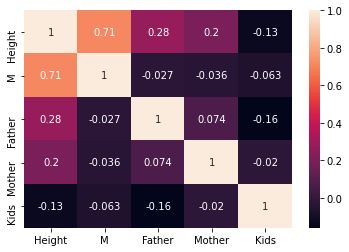

In [85]:
sns.heatmap(data[k].corr(), annot = True)

# **Train Model**

In [18]:
from sklearn.model_selection import train_test_split

In [92]:
x_train, x_test, y_train, y_test = train_test_split(data.drop('Height', axis = 1),
                                                    data['Height'], test_size = 0.2,
                                                    random_state = 42)

In [93]:
from sklearn.linear_model import LinearRegression

In [94]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

# **Test Model**

In [95]:
y_pred = reg.predict(x_test)

Text(0, 0.5, 'y_pred')

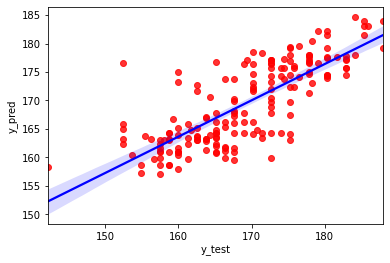

In [96]:
sns.regplot(x = y_test, y = y_pred, color = 'red', line_kws={"color": "blue"})
plt.xlabel("y_test")
plt.ylabel("y_pred")

In [97]:
from sklearn.metrics import mean_absolute_error

In [98]:
print(mean_absolute_error(y_test, y_pred))

4.142849897973088


### Prediction of real values

In [99]:
             #Father  #Mother  #kid   #Male?
reg.predict([[178.0,  169.0  ,   2    , 1 ]])

array([179.29684154])

In [100]:
             #Father  #Mother  #kid   #Male?
reg.predict([[178.0,  169.0  ,   1    , 0 ]])

array([166.06456426])

In [101]:
             #Father  #Mother  #kid   #Male?
reg.predict([[198.0,  182.0  ,   2    , 1 ]])

array([191.34012282])

In [102]:
             #Father  #Mother  #kid   #Male?
reg.predict([[162.0,  155.0  ,   3    , 0 ]])

array([155.13510125])